In [2]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
# fetch the training file
file_path_20_percent = 'KDDTrain+_20Percent.txt'
file_path_full_training_set = 'KDDTrain+_20Percent.txt'
file_path_test = 'KDDTest+.txt'

#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [4]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [6]:
np.shape(df)

(25191, 44)

In [7]:
set(df['protocol_type'])

{'icmp', 'tcp', 'udp'}

In [8]:
set(df['attack'])

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [9]:
set(df['service'])

{'IRC',
 'X11',
 'Z39_50',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'hostnames',
 'http',
 'http_443',
 'http_8001',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois'}

In [10]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [11]:
set(df['attack_map'])

{0, 1, 2, 3, 4}

In [12]:
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   

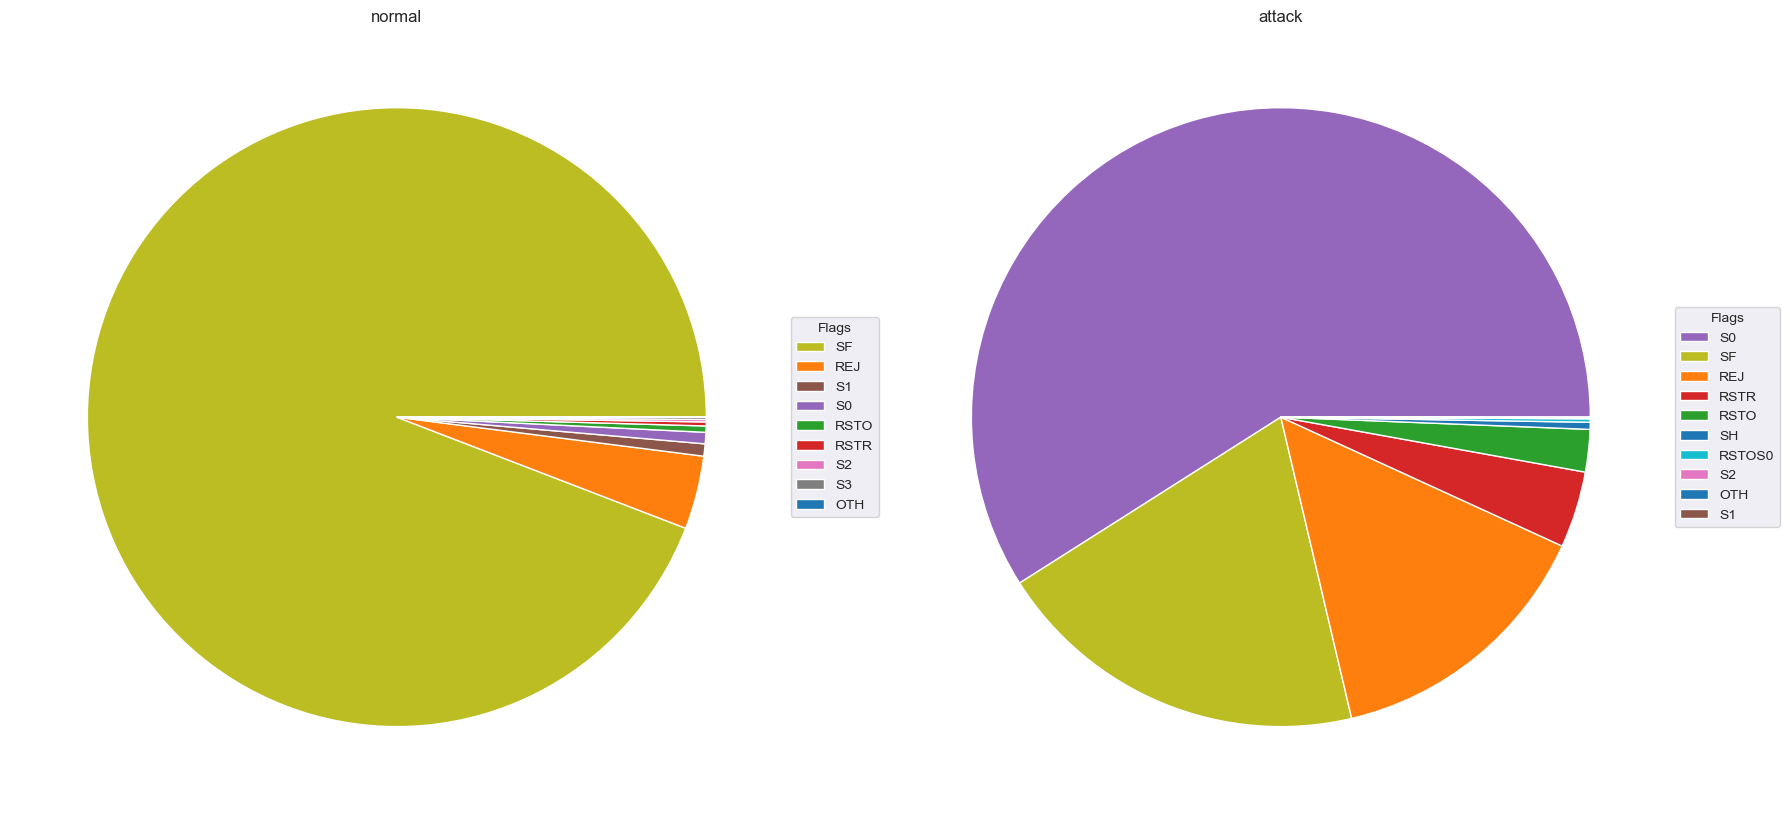

In [13]:
# # get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# # create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

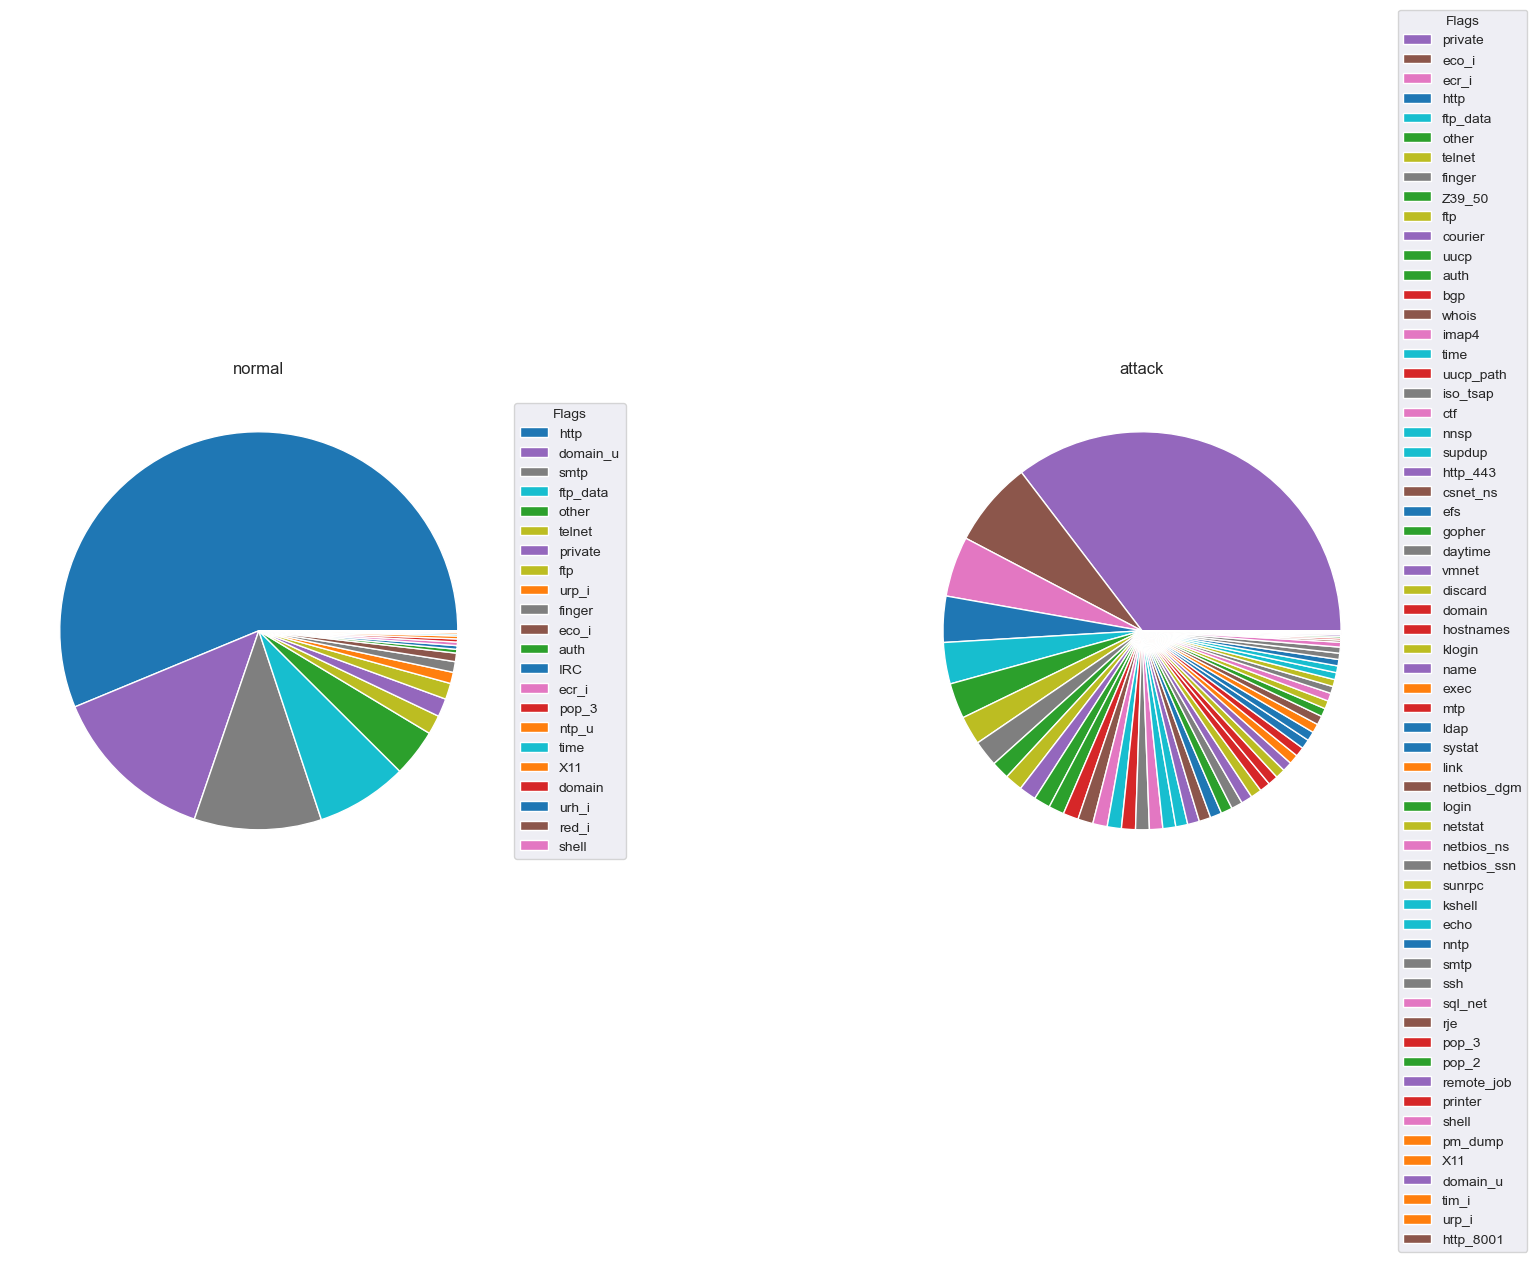

In [14]:
# # get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()


In [15]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [16]:
# create our target classifications
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.2)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)

In [17]:
binary_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20152 entries, 8718 to 723
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   protocol_type_icmp   20152 non-null  uint8
 1   protocol_type_tcp    20152 non-null  uint8
 2   protocol_type_udp    20152 non-null  uint8
 3   service_IRC          20152 non-null  uint8
 4   service_X11          20152 non-null  uint8
 5   service_Z39_50       20152 non-null  uint8
 6   service_auth         20152 non-null  uint8
 7   service_bgp          20152 non-null  uint8
 8   service_courier      20152 non-null  uint8
 9   service_csnet_ns     20152 non-null  uint8
 10  service_ctf          20152 non-null  uint8
 11  service_daytime      20152 non-null  uint8
 12  service_discard      20152 non-null  uint8
 13  service_domain       20152 non-null  uint8
 14  service_domain_u     20152 non-null  uint8
 15  service_echo         20152 non-null  uint8
 16  service_eco_i        

In [18]:
binary_train_X.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
14694,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,11,104,1413
18659,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,31,1505,4152
1473,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
621,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22665,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,229,7149


In [19]:
#Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
X_train = binary_train_X
y_train = binary_train_y
X_test = binary_val_X
y_test = binary_val_y

# **AdaBoost**

In [21]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(binary_train_X, binary_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [22]:
predictions = classifier.predict(binary_val_X)

Confusion matrix, without normalization


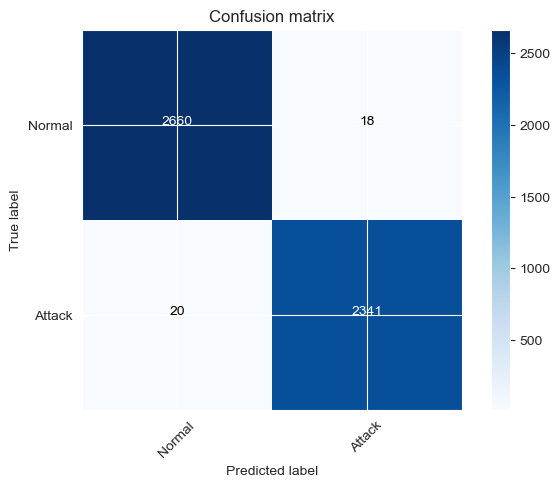

In [23]:
cm = metrics.confusion_matrix(binary_val_y, predictions)
plot_confusion_matrix(cm, classes=['Normal', 'Attack'])

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
adaboost_recall = recall_score(y_test, predictions)
adaboost_precision = precision_score(y_test, predictions)
adaboost_f1 = f1_score(y_test, predictions)
print(adaboost_recall, adaboost_precision, adaboost_f1)

0.9915290131300296 0.9923696481559983 0.9919491525423728


In [93]:
adaboost_accuracy = accuracy_score(y_test, predictions)

# **KNN**

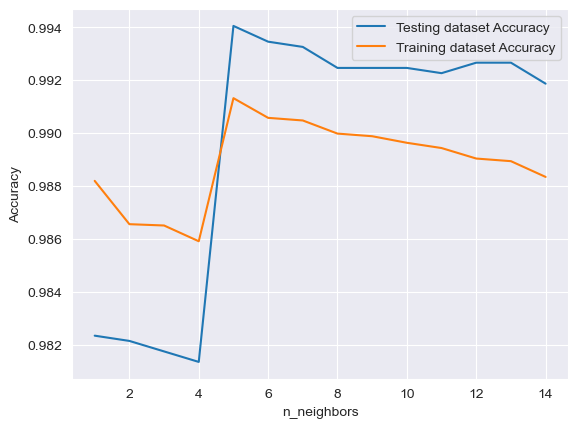

In [94]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(binary_train_X, binary_train_y)
#print(knn.predict(binary_val_X))
print("Accuracy over test dataset = ", knn.score(binary_val_X, binary_val_y))


Accuracy over test dataset =  0.9787656281008137


From the above graph, we can conclude that **k=3** will give the highest accuracy for knn model over test dataset.

/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


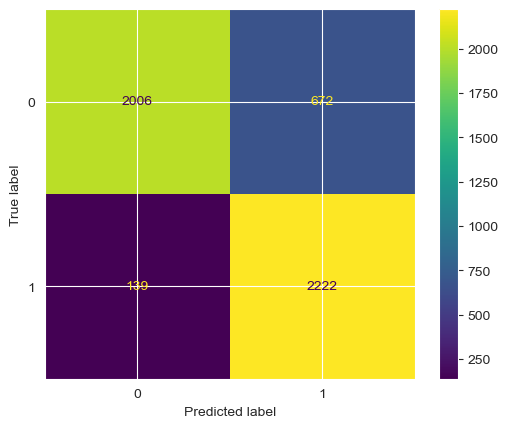

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test), labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
knn_recall = recall_score(y_test, knn.predict(X_test))
knn_precision = precision_score(y_test, knn.predict(X_test))
knn_f1 = f1_score(y_test, knn.predict(X_test))
print(knn_recall, knn_precision, knn_f1)

/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.941126641253706 0.7677954388389772 0.8456707897240723


In [91]:
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))

/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **Decision Tree**

In [31]:
#decision tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
# regressor = DecisionTreeRegressor(random_state = 0)
regressor = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_split=20, min_samples_leaf=10, criterion='entropy')

  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test).astype(int)
print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

Accuracy over test data =  0.984917642389363


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2657   21]
 [  55 2306]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2678
           1       0.99      0.98      0.98      2361

    accuracy                           0.98      5039
   macro avg       0.99      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
dt_recall = recall_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
print(dt_recall, dt_precision, dt_f1)

0.9767047861075815 0.9909755049419854 0.9837883959044369


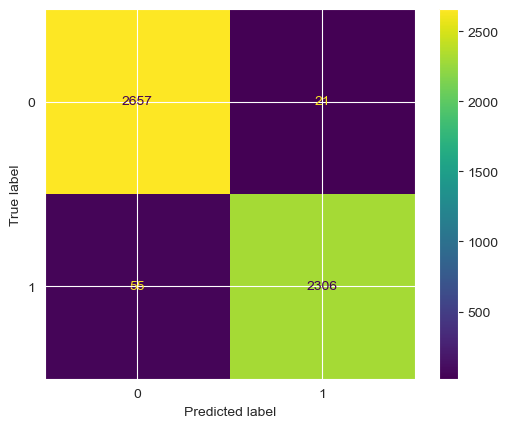

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [36]:
dt_accuracy = accuracy_score(y_test, y_pred)

# **Naive Bayes Classifier**

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

Accuracy over test data =  0.7019249851160945


In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
print(rf_recall, rf_precision, rf_f1)

0.3646759847522236 0.9976825028968713 0.5341191066997518


In [38]:
gnb

GaussianNB()

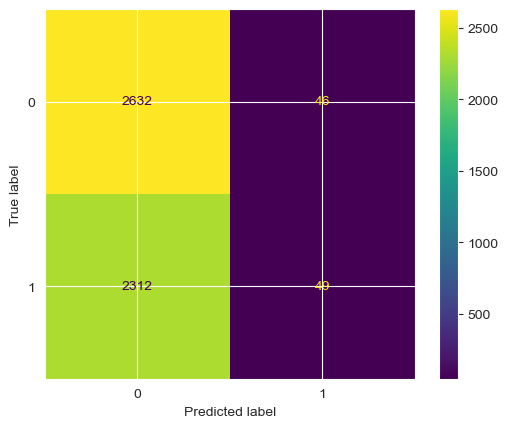

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

# **Random Forest**

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset

y_pred = clf.predict(X_test)

print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

Accuracy over test data =  0.9956340543758683


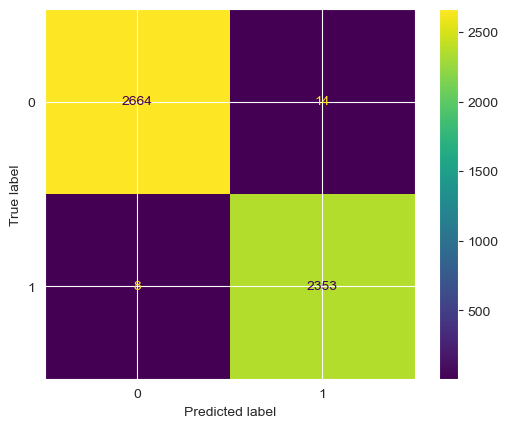

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
print(rf_recall, rf_precision, rf_f1)

0.9966116052520119 0.9940853400929447 0.995346869712352


In [83]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.9956340543758683

# **Support Vector Machine (SVM)**

In [44]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy over test data = ", metrics.accuracy_score(y_test, y_pred))

Accuracy over test data =  0.5318515578487795


Under Construnction for next Review

In [45]:
print(X_train.shape)
print(y_train.shape)

(20152, 83)
(20152,)


In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [47]:

# Scale the data to improve performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the DNN model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer
optimizer = Adam(lr=0.001)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


optimizer = Adam(lr=0.001)


# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
def lr_scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))
lr_schedule = LearningRateScheduler(lr_scheduler)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), )
# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Metal device set to: Apple M1 Pro


Epoch 1/50


2023-04-09 22:31:29.525986: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


158/158 [==============================] - 12s 48ms/step - loss: 0.1945 - accuracy: 0.9376 - val_loss: 1.8259 - val_accuracy: 0.5394
Epoch 2/50
158/158 [==============================] - 6s 38ms/step - loss: 0.1511 - accuracy: 0.9544 - val_loss: 0.6304 - val_accuracy: 0.7120
Epoch 3/50
158/158 [==============================] - 6s 39ms/step - loss: 0.1431 - accuracy: 0.9568 - val_loss: 0.1413 - val_accuracy: 0.9478
Epoch 4/50
158/158 [==============================] - 6s 41ms/step - loss: 0.1313 - accuracy: 0.9579 - val_loss: 0.1908 - val_accuracy: 0.9256
Epoch 5/50
158/158 [==============================] - 6s 39ms/step - loss: 0.1353 - accuracy: 0.9575 - val_loss: 0.1365 - val_accuracy: 0.9671
Epoch 6/50
158/158 [==============================] - 6s 41ms/step - loss: 0.1293 - accuracy: 0.9585 - val_loss: 0.1186 - val_accuracy: 0.9667
Epoch 7/50
158/158 [==============================] - 6s 38ms/step - loss: 0.1212 - accuracy: 0.9590 - val_loss: 0.0995 - val_accuracy: 0.9675
Epoch 8/5

Test loss: 0.10254164785146713
Test accuracy: 0.9678508043289185
Epoch 1/10
158/158 [==============================] - 9s 46ms/step - loss: 0.1239 - accuracy: 0.9583 - val_loss: 0.6213 - val_accuracy: 0.5741
Epoch 2/10
158/158 [==============================] - 6s 39ms/step - loss: 0.1190 - accuracy: 0.9615 - val_loss: 0.1928 - val_accuracy: 0.9184
Epoch 3/10
158/158 [==============================] - 6s 38ms/step - loss: 0.1138 - accuracy: 0.9607 - val_loss: 0.1111 - val_accuracy: 0.9663
Epoch 4/10
158/158 [==============================] - 6s 38ms/step - loss: 0.1099 - accuracy: 0.9636 - val_loss: 0.1295 - val_accuracy: 0.9635
Epoch 5/10
158/158 [==============================] - 6s 41ms/step - loss: 0.1173 - accuracy: 0.9611 - val_loss: 0.2832 - val_accuracy: 0.9270
Epoch 6/10
158/158 [==============================] - 6s 37ms/step - loss: 0.1221 - accuracy: 0.9600 - val_loss: 0.1163 - val_accuracy: 0.9649
Epoch 7/10
158/158 [==============================] - 6s 37ms/step - loss: 0.

In [48]:
dnn = model

In [49]:
y_pred = dnn.predict(X_test)
y_pred.shape

158/158 [==============================] - 2s 9ms/step


(5039, 1)

In [50]:
y_pred = model.predict(X_test)
for i in y_pred:
    if i[0] > 0.5:
        i[0] = 1
    else:
        i[0] = 0

158/158 [==============================] - 1s 8ms/step


In [51]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

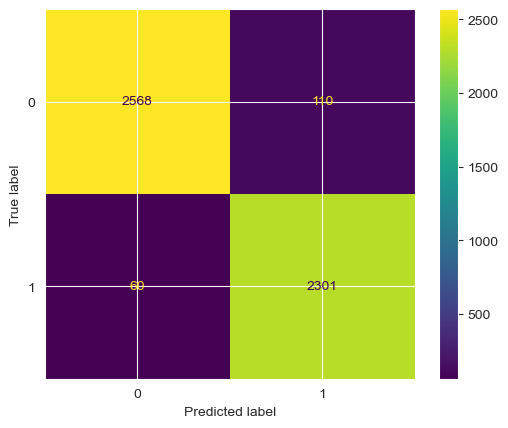

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2678
           1       0.95      0.97      0.96      2361

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
dnn_recall = recall_score(y_test, y_pred)
dnn_precision = precision_score(y_test, y_pred)
dnn_f1 = f1_score(y_test, y_pred)
dnn_accuracy = accuracy_score(y_test,y_pred )
print(rf_recall, rf_precision, rf_f1, dnn_accuracy)

0.02075391783142736 0.5157894736842106 0.03990228013029316 0.9662631474498908


# **Ensemble**

In [55]:
!pip install vecstack

# **ENSEMBLE MODEL - STACKING**

In [72]:
from vecstack import stacking
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six

from mlxtend.classifier import StackingClassifier

model_1 = classifier #adaboost
model_2 = knn #knn
model_3 = clf #random forest
model_4 = regressor #decision tree
model_5 = dnn #deep Neural Network
# putting all base model objects in one list
all_models = [model_2, model_3, model_4]

clf_stack = StackingClassifier(classifiers =all_models, meta_classifier = model_1, average_probas = True, use_features_in_secondary = True)

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test)

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)


accuracy score of Stacked model: 99.26572732685057


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
stacked_recall = recall_score(y_test, pred_stack)
stacked_precision = precision_score(y_test, pred_stack)
stacked_f1 = f1_score(y_test, pred_stack)
print(stacked_recall, stacked_precision, stacked_f1)

0.9894112664125371 0.9948892674616695 0.9921427054576343


In [74]:
stacked_accuracy = accuracy_score(y_test, pred_stack)
print(stacked_accuracy)

0.9926572732685056


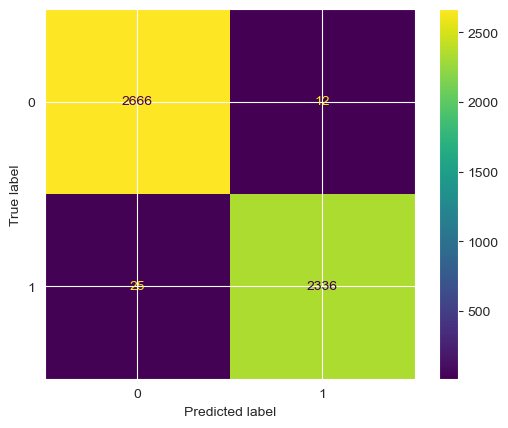

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_stack, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [76]:
disp2  =classification_report(y_test, pred_stack)
print(disp2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2678
           1       0.99      0.99      0.99      2361

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



# **ENSAMBLE MODEL - VOTING**

In [77]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
stacked_recall = recall_score(y_test, pred_final)
stacked_precision = precision_score(y_test, pred_final)
stacked_f1 = f1_score(y_test, pred_final)
print(stacked_recall, stacked_precision, stacked_f1)

0.9953409572215163 0.9936575052854123 0.9944985188319933


0.9948402460805715


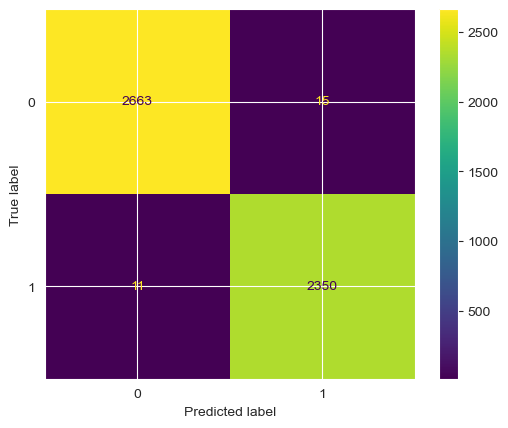

In [79]:
stacked_accuracy = accuracy_score(y_test, pred_final)
print(stacked_accuracy)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_final, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [80]:
disp3  =classification_report(y_test, pred_final)
print(disp3)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2678
           1       0.99      1.00      0.99      2361

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



# **VISUALIZATION**

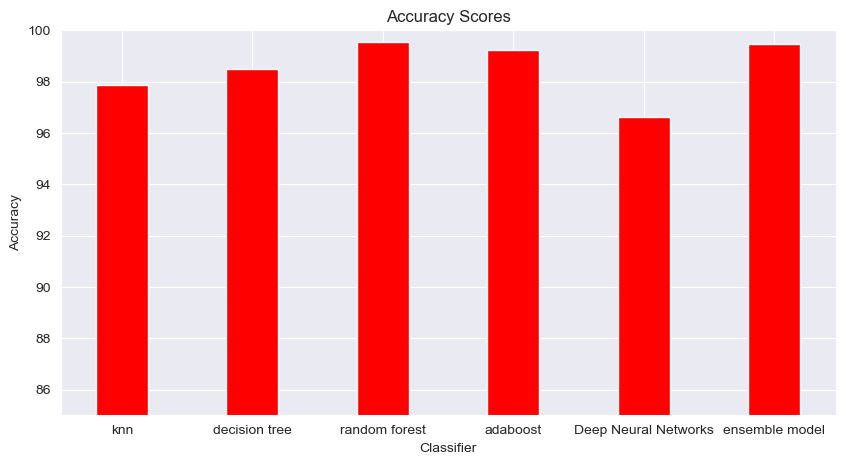

[97.87656281008137, 98.4917642389363, 99.56340543758682, 99.24588211946815, 96.62631474498909, 99.48402460805715]


In [84]:
#accuracy scores
accuracy_scores = ["knn", "decision tree", "random forest", "adaboost","Deep Neural Networks", "ensemble model"]
acc_scores = [knn_accuracy*100, dt_accuracy*100, rf_accuracy*100, adaboost_accuracy*100, dnn_accuracy*100,stacked_accuracy*100]
fig = plt.figure(figsize = (10, 5))
plt.bar(accuracy_scores, acc_scores, color ='red', width = 0.4)
plt.ylim((85,100))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores")
plt.show()
print(acc_scores)

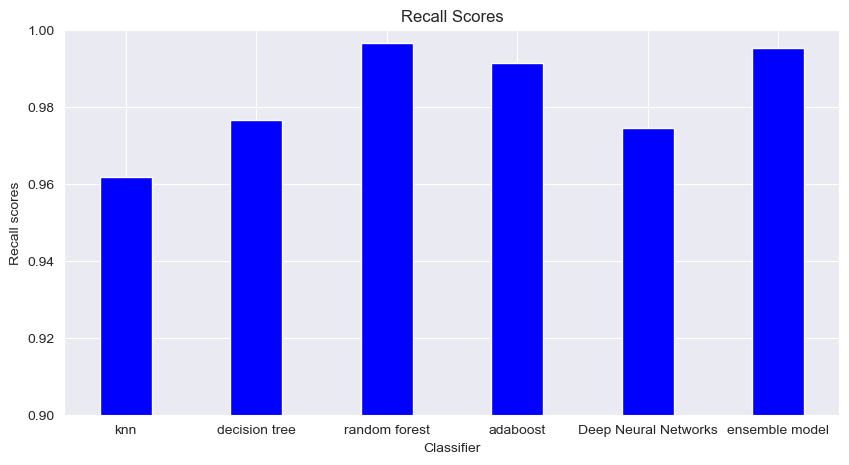

[0.9618805590851334, 0.9767047861075815, 0.9966116052520119, 0.9915290131300296, 0.974587039390089, 0.9953409572215163]


In [85]:
#recall scores
algos = ["knn", "decision tree", "random forest", "adaboost","Deep Neural Networks", "ensemble model"]
recall_scores = [knn_recall, dt_recall, rf_recall, adaboost_recall,dnn_recall, stacked_recall]
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, recall_scores, color ='blue', width = 0.4)

plt.ylim(0.9,1)
plt.xlabel("Classifier")
plt.ylabel("Recall scores")
plt.title("Recall Scores")
plt.show()
print(recall_scores)

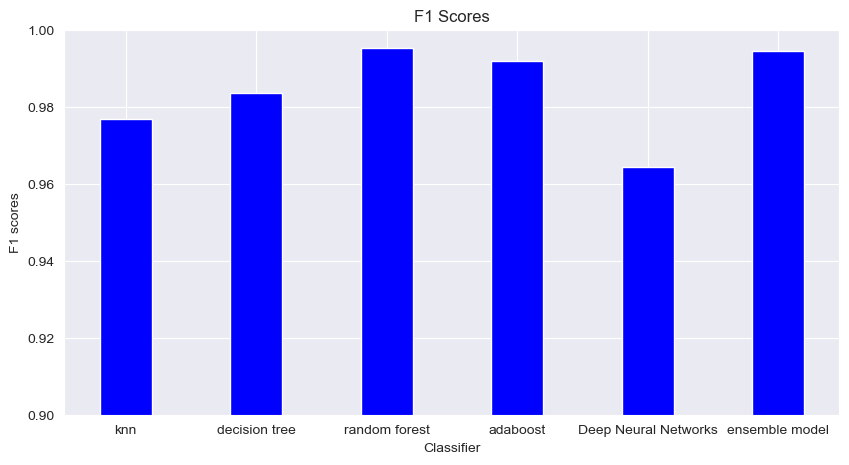

[0.9769842976984296, 0.9837883959044369, 0.995346869712352, 0.9919491525423728, 0.9643755238893545, 0.9944985188319933]


In [86]:
#f1 scores
algos = ["knn", "decision tree", "random forest", "adaboost","Deep Neural Networks", "ensemble model"]
f1_scores = [knn_f1, dt_f1, rf_f1, adaboost_f1,dnn_f1, stacked_f1]
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, f1_scores, color ='blue', width = 0.4)

plt.ylim(0.9,1)
plt.xlabel("Classifier")
plt.ylabel("F1 scores")
plt.title("F1 Scores")
plt.show()
print(f1_scores)

NameError: name 'prec_scores' is not defined

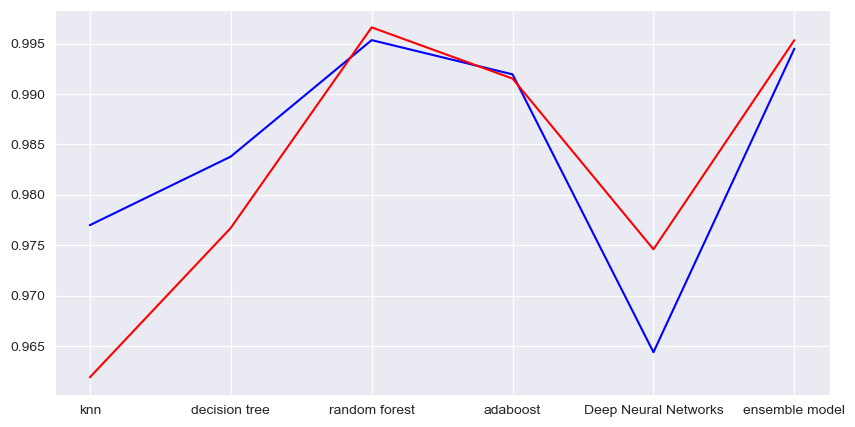

In [87]:
fig = plt.figure(figsize = (10, 5))
plt.plot(algos, f1_scores, color ='blue')
plt.plot(algos, recall_scores, color ='red')
plt.plot(algos, prec_scores, color ='black')
plt.legend(["F1", "Recall", "Precision"], loc ="lower right")
plt.ylim(0.9,1)
plt.xlabel("Classifier")
plt.show()